In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns',30)

In [46]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


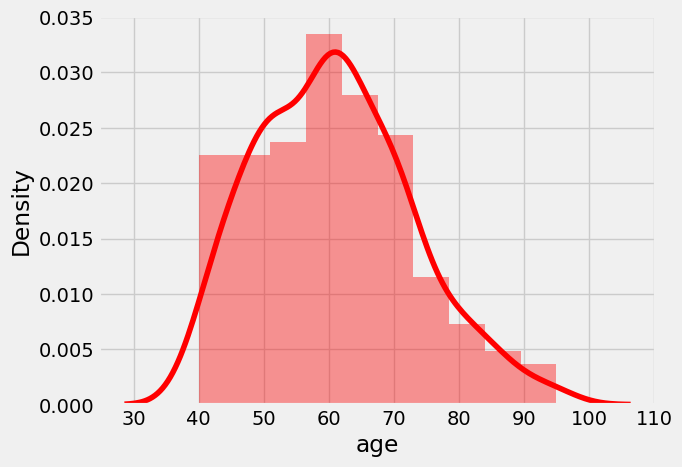

In [47]:
# 1 What is the distribution of age among heart failure patients in the dataset

sns.distplot(df['age'],kde=True, color='red')
plt.show()

<Axes: xlabel='age', ylabel='DEATH_EVENT'>

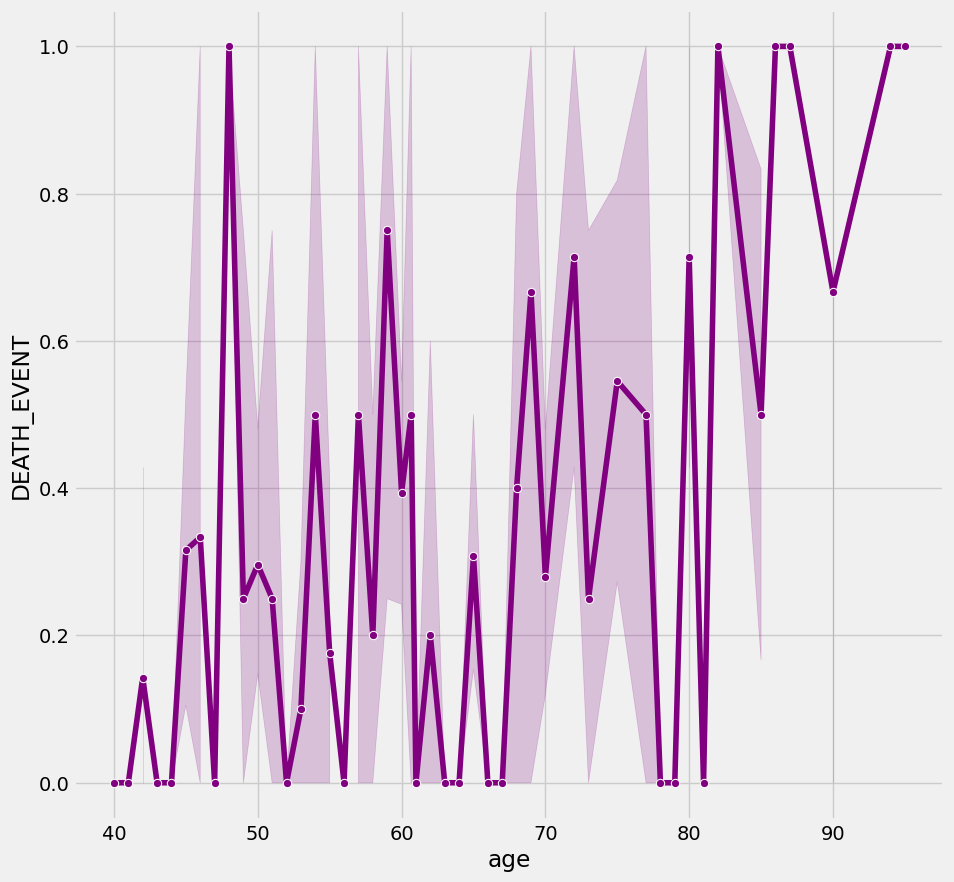

In [48]:
# 2 How does the death rate vary with age?
plt.figure(figsize=(10,10))
sns.lineplot(x='age', y='DEATH_EVENT', data=df, marker='o', color='purple')

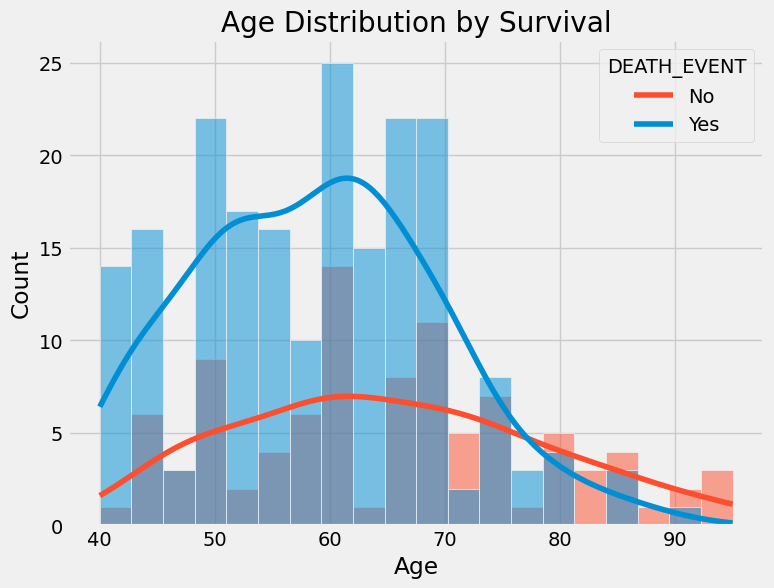

In [49]:
# 2 How does the death rate vary with age?


plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="age", hue="DEATH_EVENT", bins=20, kde=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="DEATH_EVENT", labels=["No", "Yes"])
plt.show()

In [52]:
# 3. What is the percentage of male and female patients in the dataset?

gender_percentage = df.sex.map({1:"Male",0:"Female"}).value_counts(normalize=True).reset_index(name="gender_perce")
gender_percentage['gender_perce']= (gender_percentage['gender_perce'] * 100).round(2).astype(str) + '%'
gender_percentage

,index,gender_perce
0,Male,64.88%
1,Female,35.12%


In [53]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Age_Group
0-18               NaN
19-40    262428.571429
41-60    268171.963806
61+      257959.097518
Name: platelets, dtype: float64


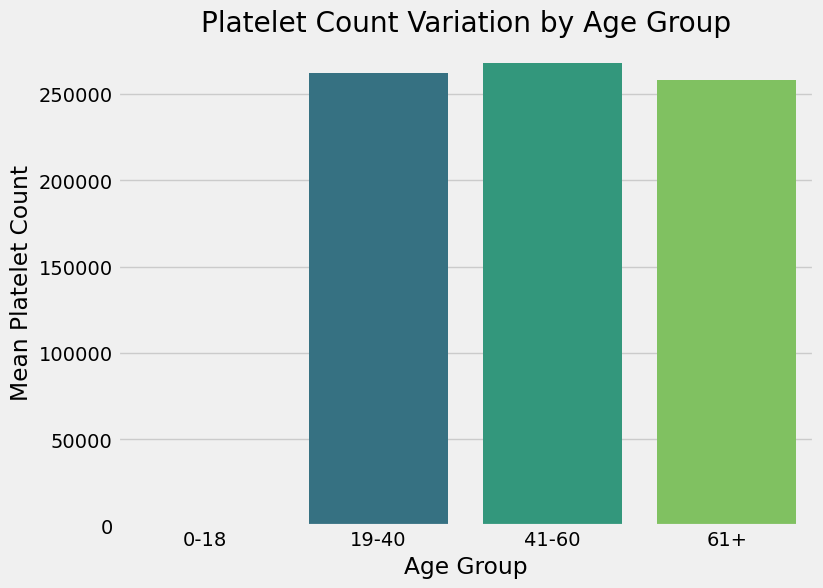

In [60]:
# 4 How does the platelet count varies amoung different age groups

age_bins = [0, 18, 40, 60, 100]
age_labels = ['0-18', '19-40', '41-60', '61+']

# Create an 'Age_Group' column based on age bins
df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
age_group_counts = df.groupby('Age_Group')['platelets'].mean()
print(age_group_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')

plt.xlabel('Age Group')
plt.ylabel('Mean Platelet Count')
plt.title('Platelet Count Variation by Age Group')
plt.show()

In [63]:
# 5. iS THERE A CORRELATION BETWEEN CAREATINIE AND SODIUM LEVELS IN THE BLOOD? 
df[['serum_creatinine','serum_sodium']].corr()

,serum_creatinine,serum_sodium
serum_creatinine,1.000000,-0.189095
serum_sodium,-0.189095,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


sex
0    41.904762
1    31.443299
Name: high_blood_pressure, dtype: float64


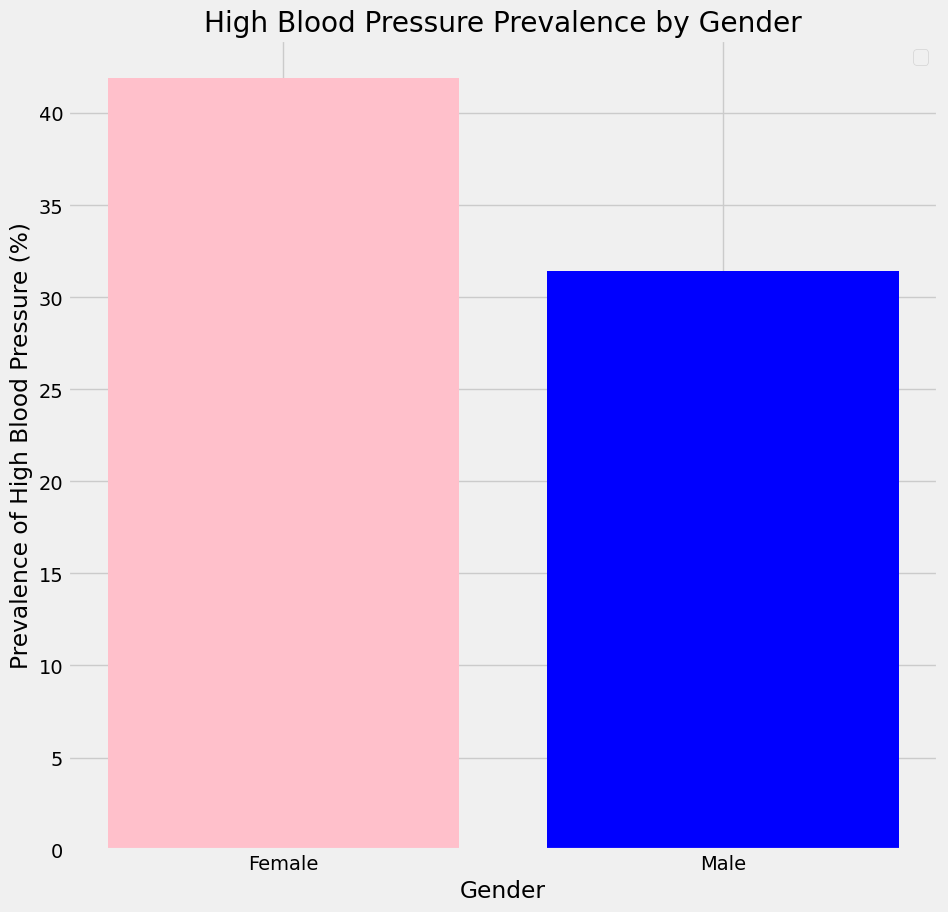

In [76]:
# 6 How does the prevalence of high blood pressure differ between male and female patients<

gender_prevalence = df.groupby('sex')['high_blood_pressure'].mean() * 100
print(gender_prevalence)
# # Create a bar plot
plt.figure(figsize=(10, 10))
plt.bar(gender_prevalence.index, gender_prevalence.values, color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Prevalence of High Blood Pressure (%)')
plt.legend()
plt.title('High Blood Pressure Prevalence by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
# plt.ylim(0, 100)
plt.show()

<Figure size 640x480 with 0 Axes>

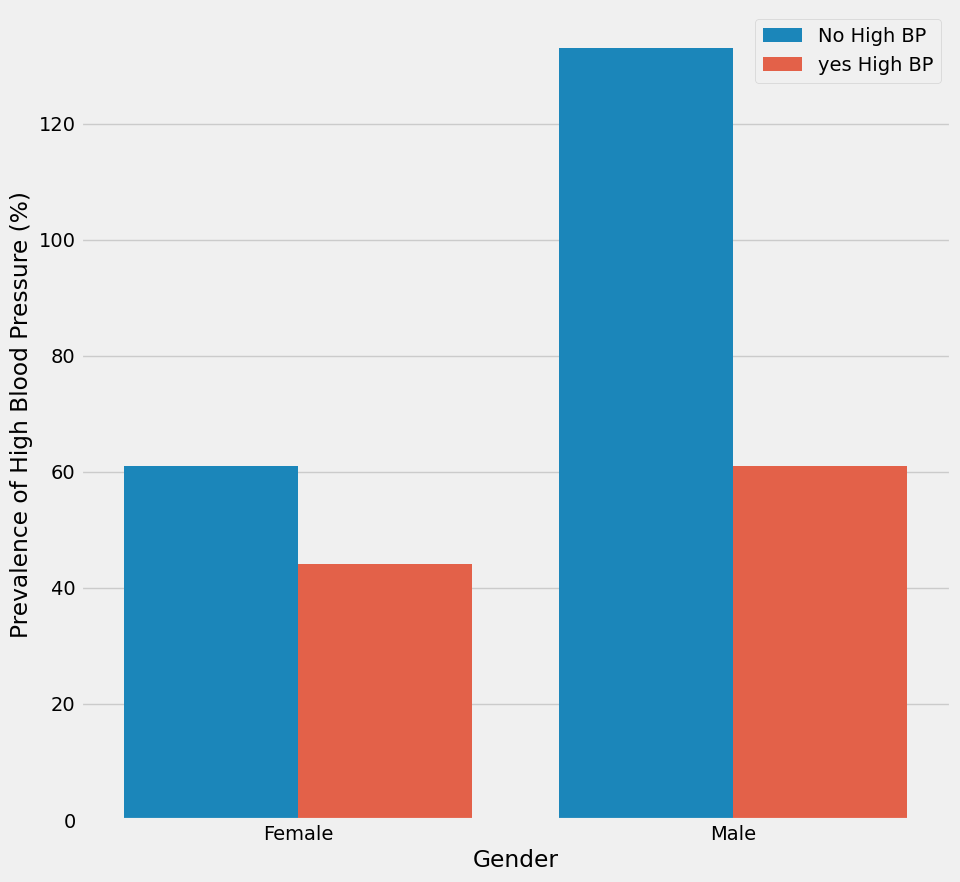

In [85]:
plt.figure()
fig, ax =plt.subplots(figsize = (10,10))
# Bar plot count plot
sns.countplot(x='sex', hue='high_blood_pressure', data=df)
plt.legend(["No High BP", "yes High BP"])
# plt.xlabel('Gender')
# plt.ylabel('Prevalence of High Blood Pressure (%)')
ax.set(xlabel= 'Gender',ylabel='Prevalence of High Blood Pressure (%)')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

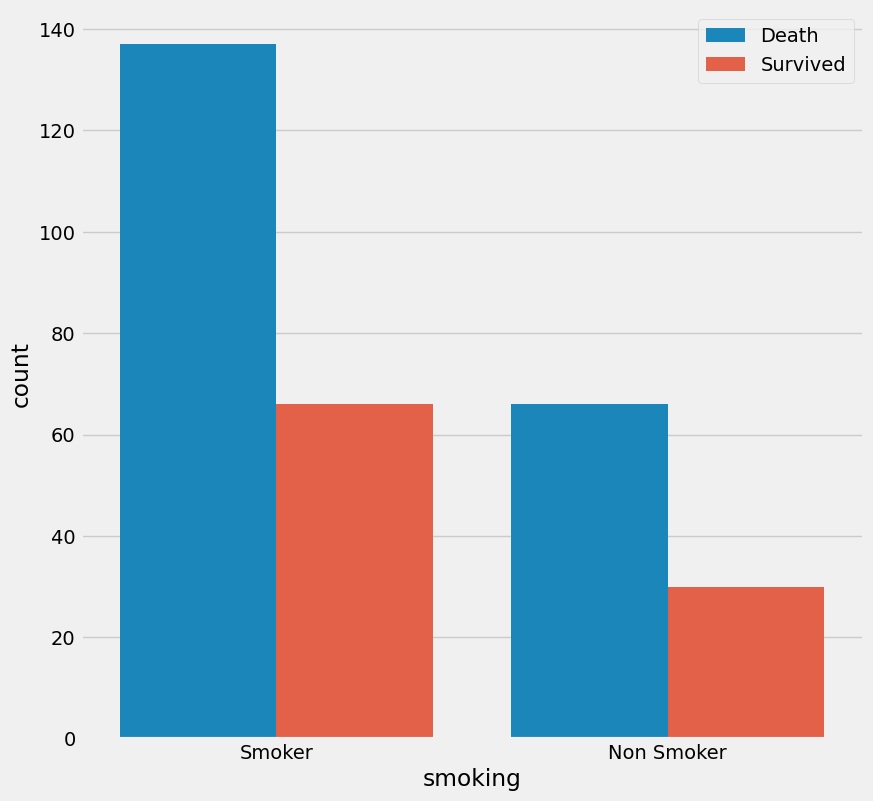

In [89]:
# 6 what is the relationship between smoking habits and the occurrence of heart failure?

plt.figure(figsize=(9,9))
# Bar plot count plot
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)
plt.legend(["Death", "Survived"])
# plt.xlabel('Gender')
# plt.ylabel('Prevalence of High Blood Pressure (%)')
plt.xticks([0, 1], ['Smoker', 'Non Smoker'])
plt.show()

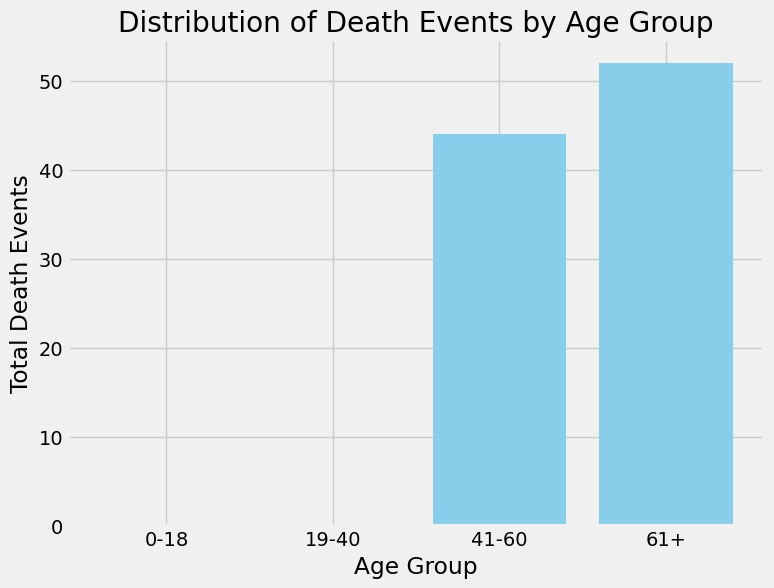

In [92]:
# 6 Are there any noticeable patterns in the distribution of death events across different age groups?

age_bins = [0, 18, 40, 60, 100]
age_labels = ['0-18', '19-40', '41-60', '61+']

# Assign age group labels based on bins
df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Group by age group and calculate total death events
age_group_deaths = df.groupby('Age_Group')['DEATH_EVENT'].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(age_group_deaths.index, age_group_deaths.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Total Death Events')
plt.title('Distribution of Death Events by Age Group')
plt.show()

# insights:  Death Happens only after the age group of 40_

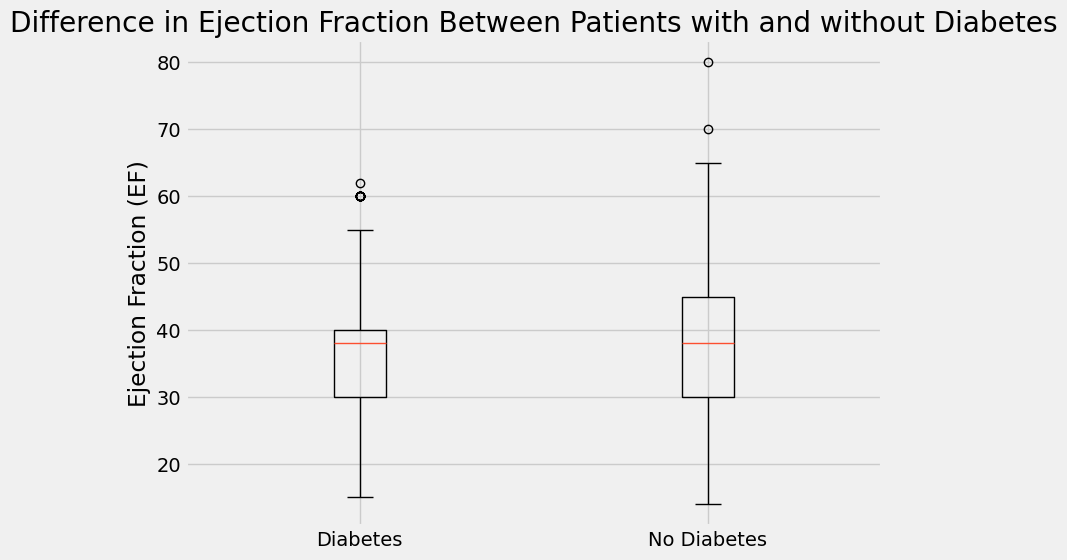

In [97]:
# 9 Is there any significant difference in ejection fraction between patients with and without diabetes?
df
ef_diabetes = df[df['diabetes'] == 1]['ejection_fraction']
ef_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction']

plt.figure(figsize=(8, 6))
plt.boxplot([ef_diabetes, ef_no_diabetes], labels=['Diabetes', 'No Diabetes'])
plt.ylabel('Ejection Fraction (EF)')
plt.title('Difference in Ejection Fraction Between Patients with and without Diabetes')
plt.show()

In [99]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Age_Group
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,61+
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,41-60
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,61+
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,41-60
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,61+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,61+
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,41-60
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,41-60
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,41-60


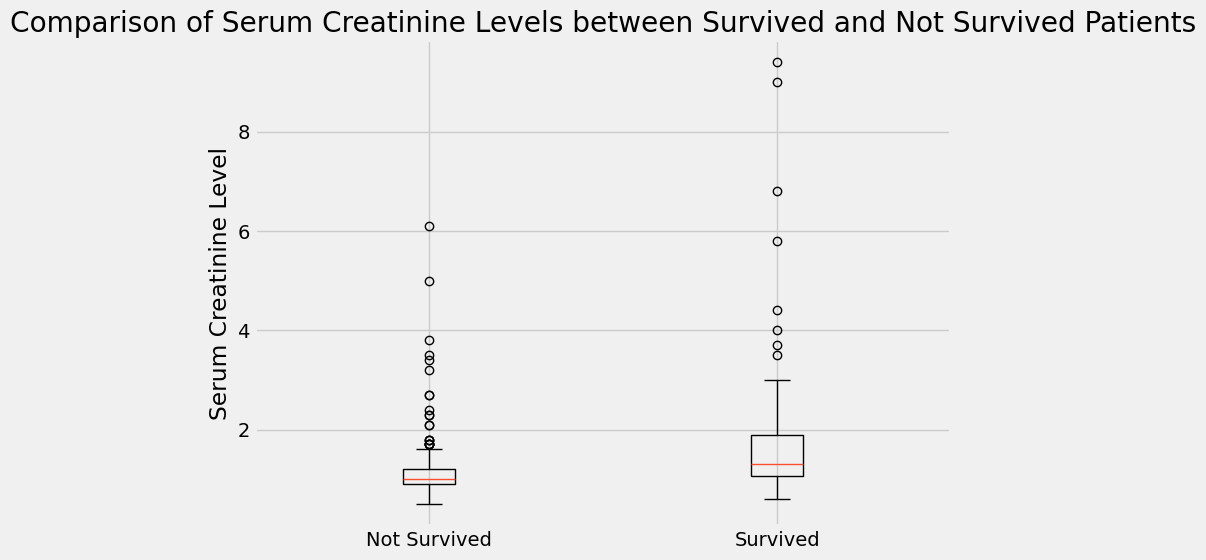

In [100]:
# 10 How does the serum creatinine levEl vary between patients who survived and those who did not?
# Create box plots for serum creatinine levels by survival status
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['DEATH_EVENT'] == 0]['serum_creatinine'],
             df[df['DEATH_EVENT'] == 1]['serum_creatinine']],
            labels=['Not Survived', 'Survived'])
plt.ylabel('Serum Creatinine Level')
plt.title('Comparison of Serum Creatinine Levels between Survived and Not Survived Patients')
plt.show()